# 1. Import Library

In [1]:
# nltk untuk nlp
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Import Library 
import pandas as pd

# Pickle untuk save model
import pickle

# Preprocessing (sklearn)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import TruncatedSVD

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dika\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 2. Import Dataset

In [2]:
# Melakukan perulangan untuk import data
df = pd.read_csv('./data/dataset_2.csv')

# 3. Understanding Dataset

In [3]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


In [4]:
# Menampilkan 5 data teratas
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [5]:
# Menampilkan jumlah persebaran data pada kolom 'Email Type'
df['Email Type'].value_counts()

Email Type
Safe Email        11322
Phishing Email     7328
Name: count, dtype: int64

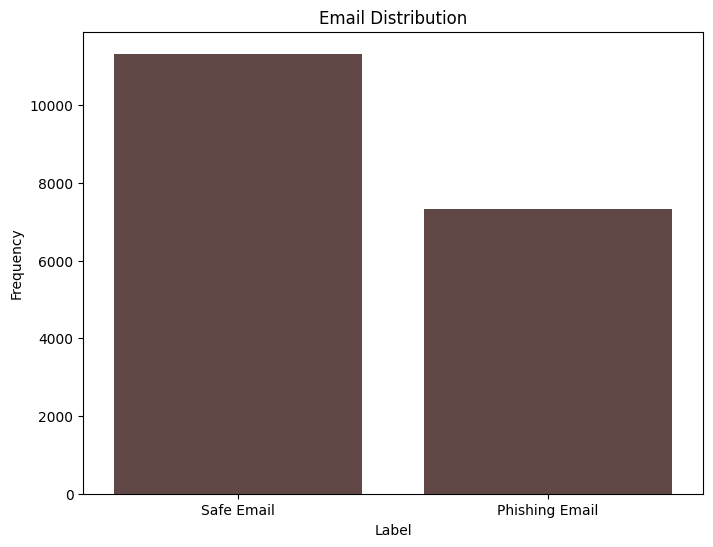

In [6]:
# Plotting persebaran data pada kolom 'Email Type'
label_counts = df['Email Type'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, color='#664343')
plt.title('Email Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Melihat jumlah baris dan kolom pada dataset
df.shape

(18650, 3)

# 4. Cleaning Data

### Data Cleaning

#### Menghapus Kolom yang Tidak Diperlukan

In [8]:
# Data Cleaning, Menghapus kolom yang tidak diperlukan
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


#### Cek Data Duplikat

In [9]:
# Mengecek duplikasi data
df.duplicated().sum()

1111

In [10]:
# Menghapus data duplikat
df = df.drop_duplicates()

In [11]:
# Cross check data duplikat
df.duplicated().sum()

0

#### Cek Nilai Null

In [12]:
# Mengecek nilai null pada dataset
df.isna().sum()

Email Text    1
Email Type    0
dtype: int64

In [13]:
# Menghapus baris yang memiliki nilai null
df = df.dropna()

In [14]:
# Melakukan cross check data null pada dataset
df.isna().sum()

Email Text    0
Email Type    0
dtype: int64

In [15]:
df.shape

(17538, 2)

### Stopwords Removal

In [16]:
sample_data = "Dear customer, your account has been flagged for suspicious activity. Please verify your credentials immediately. Thank you."

In [17]:
# Melakukan stopword removal
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_data = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_data)

print(f"Sebelum: {sample_data}")
print(f"Sesudah: {remove_stopwords(sample_data)}")

Sebelum: Dear customer, your account has been flagged for suspicious activity. Please verify your credentials immediately. Thank you.
Sesudah: Dear customer , account flagged suspicious activity . Please verify credentials immediately . Thank .


### Case Folding

In [18]:
# Melakukan proses case folding
def case_folding(text):
    return text.lower()

print(f"Sebelum : {sample_data}")
print(f"Sesudah : {case_folding(sample_data)}")

Sebelum : Dear customer, your account has been flagged for suspicious activity. Please verify your credentials immediately. Thank you.
Sesudah : dear customer, your account has been flagged for suspicious activity. please verify your credentials immediately. thank you.


### Stemming

In [19]:
# Melakukan proses stemming
def stemming(text):
    stemmer = PorterStemmer()
    word_tokens = word_tokenize(text)
    stemmed_data = [stemmer.stem(word) for word in word_tokens]
    return ' '.join(stemmed_data)

print(f"Sebelum : {sample_data}")
print(f"Sesudah : {stemming(sample_data)}")

Sebelum : Dear customer, your account has been flagged for suspicious activity. Please verify your credentials immediately. Thank you.
Sesudah : dear custom , your account ha been flag for suspici activ . pleas verifi your credenti immedi . thank you .


### Remove Symbol

In [20]:
# Menghapus karakter khusus
def remove_special_character(text):
    return ''.join(e for e in text if e.isalnum() or e.isspace())

print(f"Sebelum : {sample_data}")
print(f"Sesudah : {remove_special_character(sample_data)}")

Sebelum : Dear customer, your account has been flagged for suspicious activity. Please verify your credentials immediately. Thank you.
Sesudah : Dear customer your account has been flagged for suspicious activity Please verify your credentials immediately Thank you


### Tokenization

In [22]:
# Melakukan tokenisasi
def tokenization(text):
    return word_tokenize(text)

print(f"Sebelum : {sample_data}")
print(f"Sesudah : {tokenization(sample_data)}")

Sebelum : Dear customer, your account has been flagged for suspicious activity. Please verify your credentials immediately. Thank you.
Sesudah : ['Dear', 'customer', ',', 'your', 'account', 'has', 'been', 'flagged', 'for', 'suspicious', 'activity', '.', 'Please', 'verify', 'your', 'credentials', 'immediately', '.', 'Thank', 'you', '.']


# 5. Preprocessing Data

### Proses Preprocessing Data

In [23]:
# Melakukan proses preprocessing
def preprocess_text(text):
    text = remove_special_character(text)
    text = case_folding(text)
    text = remove_stopwords(text)
    text = stemming(text)
    tokens = tokenization(text)
    return ' '.join(tokens)

In [24]:
print(f"Sebelum : {sample_data}")
print(f"Sesudah : {preprocess_text(sample_data)}")

Sebelum : Dear customer, your account has been flagged for suspicious activity. Please verify your credentials immediately. Thank you.
Sesudah : dear custom account flag suspici activ pleas verifi credenti immedi thank


### Menerapkan Preprocessing pada Dataset

In [25]:
df['Email Text'] = df['Email Text'].apply(preprocess_text)

In [26]:
# Menampilkan dataset setelah dilakukan preprocessing
df.head(10)

,Email Text,Email Type
0,6 1100 disc uniformitarian 1086 sex lang dick ...,Safe Email
1,side galicismo galicismo spanish term name imp...,Safe Email
2,equistar deal ticket still avail assist robert...,Safe Email
3,hello hot lil horni toy one dream open mind pe...,Phishing Email
4,softwar incred low price 86 lower draperi seve...,Phishing Email
5,global risk manag oper salli congratul new rol...,Safe Email
6,sun aug 11 2002 111747am 0100 wintermut mentio...,Safe Email
7,entourag stockmogul newslett ralph velez genex...,Phishing Email
8,owe lot money dear applic review upon receiv a...,Phishing Email
9,coastal deal exxon particip project agreement ...,Safe Email


# 6. Exploratory Data Analysis (EDA)

### Chart 1 - Data Spam vs Ham

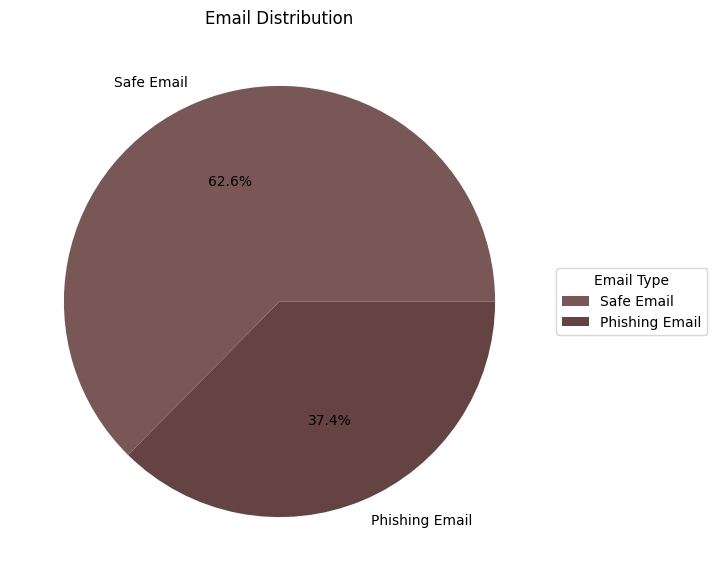

In [27]:
# Visualisasi Distribusi Data Menggunakan pie chart
label = df['Email Type'].value_counts().index

fig = plt.figure(figsize=(10, 7))
plt.pie(df['Email Type'].value_counts(), labels=label, autopct='%1.1f%%', colors=['#795757','#664343','#99ff89'])
plt.title('Email Distribution')
legend = plt.legend(title='Email Type', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

### Chart 2 - Wordcloud

#### Kata yang Sering Muncul pada Email Phishing


In [28]:
phishing_data = df[df['Email Type'] == 'Phishing Email'].copy()

In [29]:
phishing_data.head()

,Email Text,Email Type
3,hello hot lil horni toy one dream open mind pe...,Phishing Email
4,softwar incred low price 86 lower draperi seve...,Phishing Email
7,entourag stockmogul newslett ralph velez genex...,Phishing Email
8,owe lot money dear applic review upon receiv a...,Phishing Email
10,make beg give everynight pleas partner much be...,Phishing Email


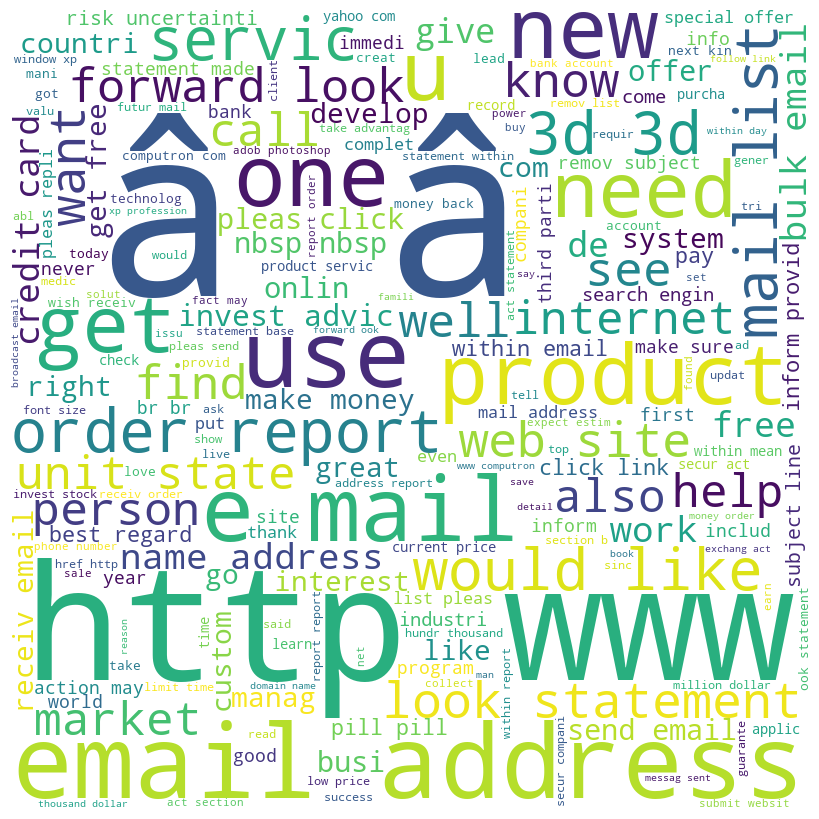

In [30]:
from wordcloud import WordCloud

stop_words = set(stopwords.words('english'))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(' '.join(phishing_data['Email Text']))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#### Kata yang Sering Muncul pada Email Non Phishing


In [31]:
non_phishing_data = df[df['Email Type'] == 'Safe Email'].copy()

In [32]:
non_phishing_data.head()

,Email Text,Email Type
0,6 1100 disc uniformitarian 1086 sex lang dick ...,Safe Email
1,side galicismo galicismo spanish term name imp...,Safe Email
2,equistar deal ticket still avail assist robert...,Safe Email
5,global risk manag oper salli congratul new rol...,Safe Email
6,sun aug 11 2002 111747am 0100 wintermut mentio...,Safe Email


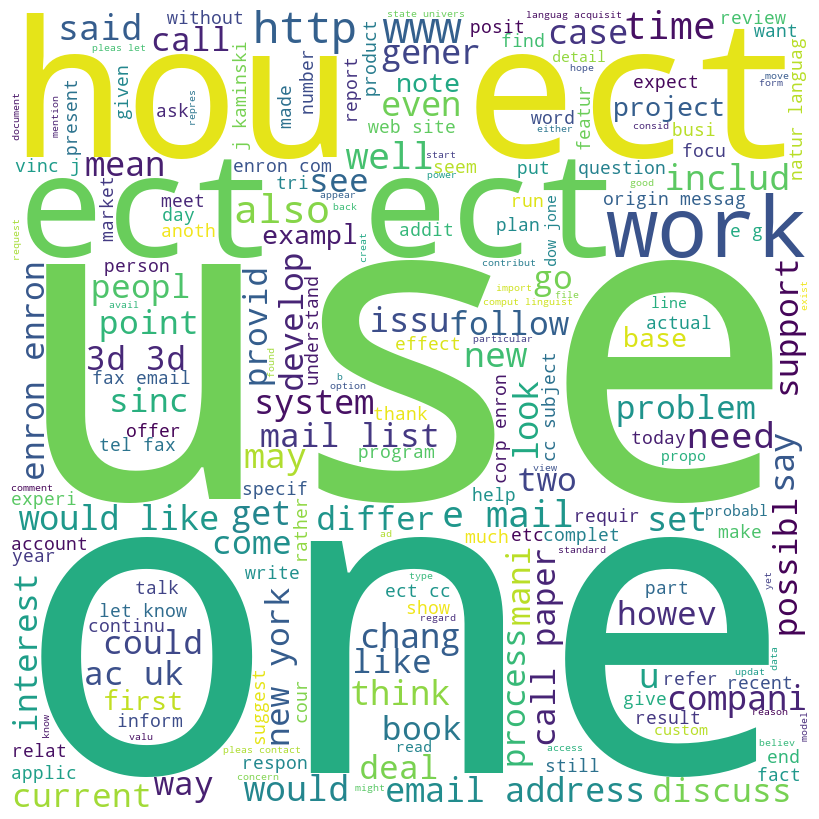

In [33]:
stop_words = set(stopwords.words('english'))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(' '.join(non_phishing_data['Email Text']))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# 7. Data Preparation

## Feature Engineering

### Word Frequency

In [34]:
# Menghitung berapa kali kata muncul pada dataset
from collections import Counter

def count_words(text):
    words = text.split()
    return Counter(words)

phishing_words = count_words(' '.join(phishing_data['Email Text']))
non_phishing_words = count_words(' '.join(non_phishing_data['Email Text']))

In [35]:
# Menampilkan 10 kata yang paling sering muncul pada email phishing
phishing_words.most_common(10)

[('email', 7044),
 ('â', 6307),
 ('compani', 4844),
 ('1', 4198),
 ('get', 4169),
 ('mail', 4128),
 ('free', 4060),
 ('order', 4016),
 ('inform', 3969),
 ('report', 3909)]

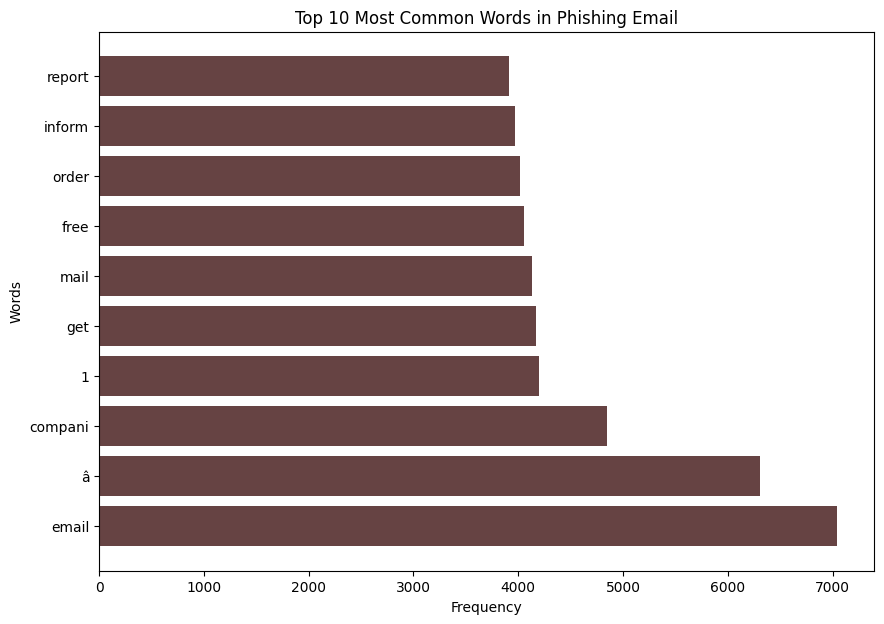

In [36]:
# Visualisasi kata yang paling sering muncul pada email phishing
plt.figure(figsize=(10, 7))
plt.barh(*zip(*phishing_words.most_common(10)), color='#664343')
plt.title('Top 10 Most Common Words in Phishing Email')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

In [37]:
# Menampilkan 10 kata yang paling sering muncul pada email non-phishing
non_phishing_words.most_common(10)

[('languag', 23378),
 ('univers', 18384),
 ('enron', 17843),
 ('linguist', 15450),
 ('1', 13767),
 ('use', 13362),
 ('inform', 11800),
 ('one', 11784),
 ('email', 11286),
 ('paper', 10929)]

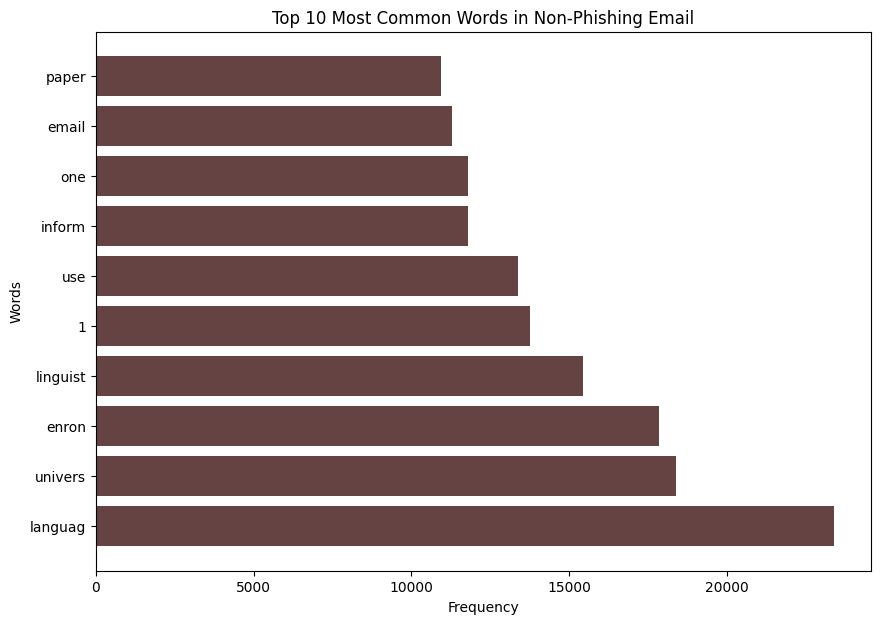

In [38]:
# Visualisasi kata yang paling sering muncul pada email non-phishing
plt.figure(figsize=(10, 7))
plt.barh(*zip(*non_phishing_words.most_common(10)), color='#664343')
plt.title('Top 10 Most Common Words in Non-Phishing Email')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

### Data Transformation using TF-IDF

In [39]:
# Melakukan Transformasi Data Menggunakan TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Email Text'])
y = df['Email Type']

In [53]:
# Return the feature names
feature_names = tfidf.get_feature_names_out()

# Menampilkan 10 feature names
feature_names[:10]

array(['00', '000', '0000', '000000', '00000000', '000000000003619',
       '000000000005168', '000000000005409', '000000000005412',
       '000000000005413'], dtype=object)

### Data Splitting

In [40]:
# Melakukan pemisahan data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = X_train.shape[0]
test_data = X_test.shape[0]

print(f"Jumlah data training: {train_data}")
print(f"Jumlah data testing: {test_data}")
print(f"Total data: {train_data + test_data}")

Jumlah data training: 14030
Jumlah data testing: 3508
Total data: 17538


# 8. Modelling

## Model Training

### 1. Support Vector Machine (SVM)

In [41]:
# Melakukan klasifikasi menggunakan Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Melakukan evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")
print(classification_report(y_test, y_pred))

# Menyimpan hasil classification report ke dalam file CSV
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv('./data/classification_report.csv')

Akurasi: 0.9834663625997719
                precision    recall  f1-score   support

Phishing Email       0.98      0.98      0.98      1295
    Safe Email       0.99      0.99      0.99      2213

      accuracy                           0.98      3508
     macro avg       0.98      0.98      0.98      3508
  weighted avg       0.98      0.98      0.98      3508



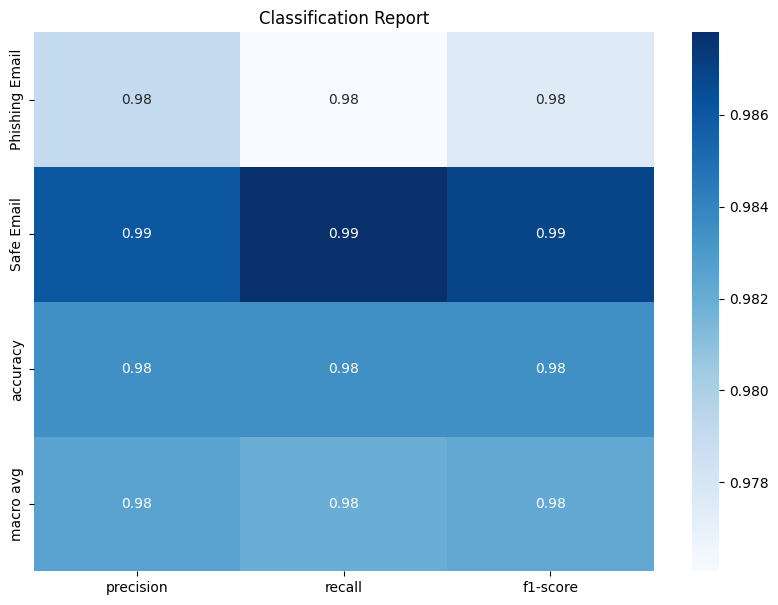

In [42]:
# Visualisasi hasil classification report
plt.figure(figsize=(10, 7))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

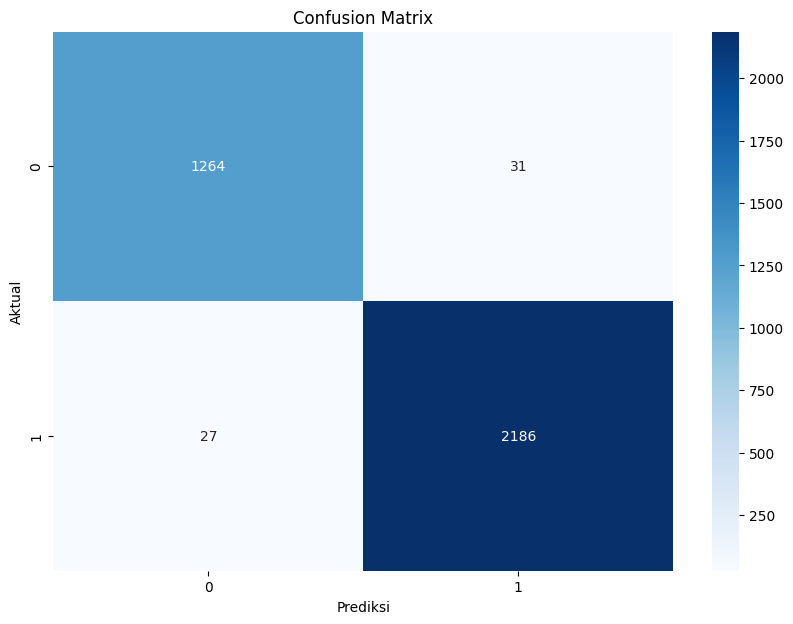

In [43]:
# Visualisasi Confussion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [44]:
# Menyimpan model ke dalam file menggunakan pickle
with open('./models/dataset_2/svm_model.pkl', 'wb') as file:
    pickle.dump(svm, file)

### 2. Decision Tree

In [45]:
# Melakukan klasifikasi menggunakan Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Melakukan evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")
print(classification_report(y_test, y_pred))

# Menyimpan hasil classification report ke dalam file CSV
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv('./data/classification_report_DT.csv')


Akurasi: 0.9179019384264538
                precision    recall  f1-score   support

Phishing Email       0.88      0.91      0.89      1295
    Safe Email       0.94      0.93      0.93      2213

      accuracy                           0.92      3508
     macro avg       0.91      0.92      0.91      3508
  weighted avg       0.92      0.92      0.92      3508



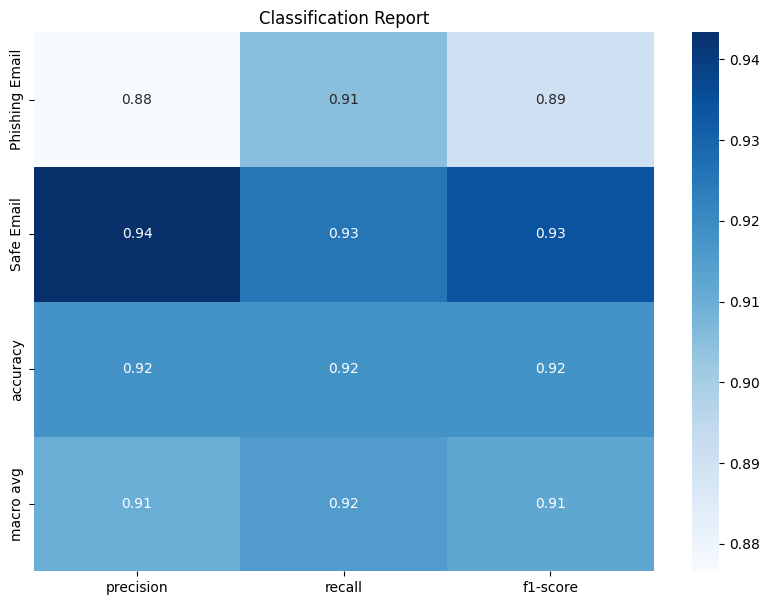

In [46]:
# Visualisasi hasil classification report
plt.figure(figsize=(10, 7))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

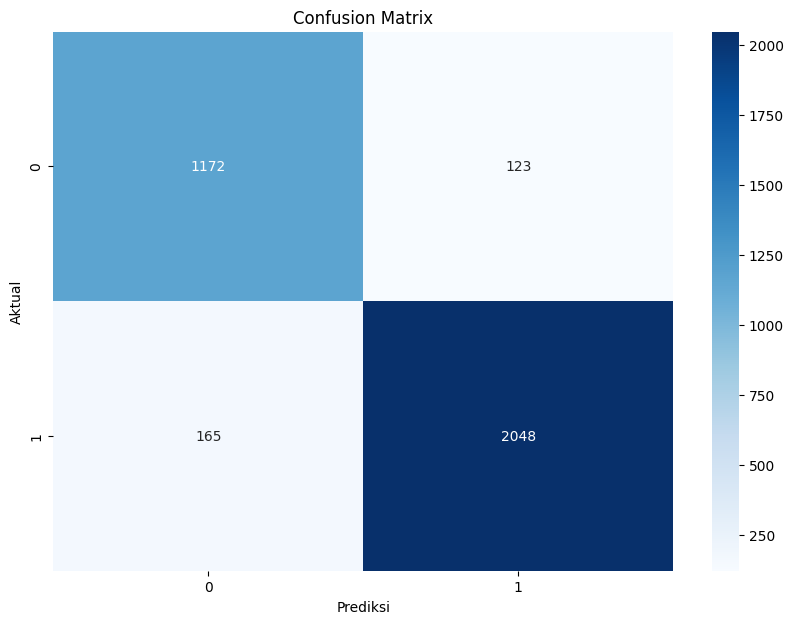

In [47]:
# Visualisasi Confussion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [48]:
# Menyimpan model ke dalam file menggunakan pickle
with open('./models/dataset_2/dt_model.pkl', 'wb') as file:
    pickle.dump(dt, file)

### 3. Naive Bayes

In [49]:
# Melakukan klasifikasi menggunakan Naive Bayes
nb = GaussianNB()
nb.fit(X_train.toarray(), y_train)
y_pred = nb.predict(X_test.toarray())

# Melakukan evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")
print(classification_report(y_test, y_pred))

# Menyimpan hasil classification report ke dalam file CSV
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv('./data/classification_report_NB.csv')

Akurasi: 0.8965222348916762
                precision    recall  f1-score   support

Phishing Email       0.86      0.86      0.86      1295
    Safe Email       0.92      0.92      0.92      2213

      accuracy                           0.90      3508
     macro avg       0.89      0.89      0.89      3508
  weighted avg       0.90      0.90      0.90      3508



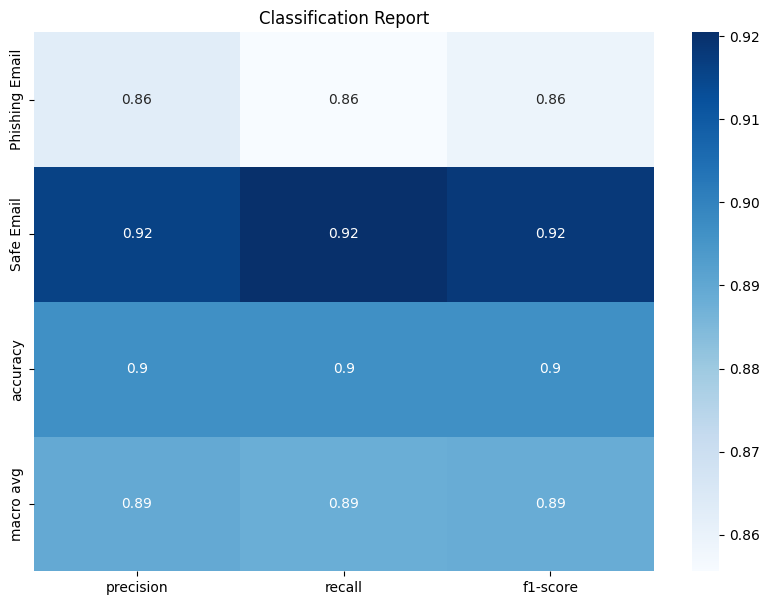

In [50]:
# Visualisasi hasil classification report
plt.figure(figsize=(10, 7))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

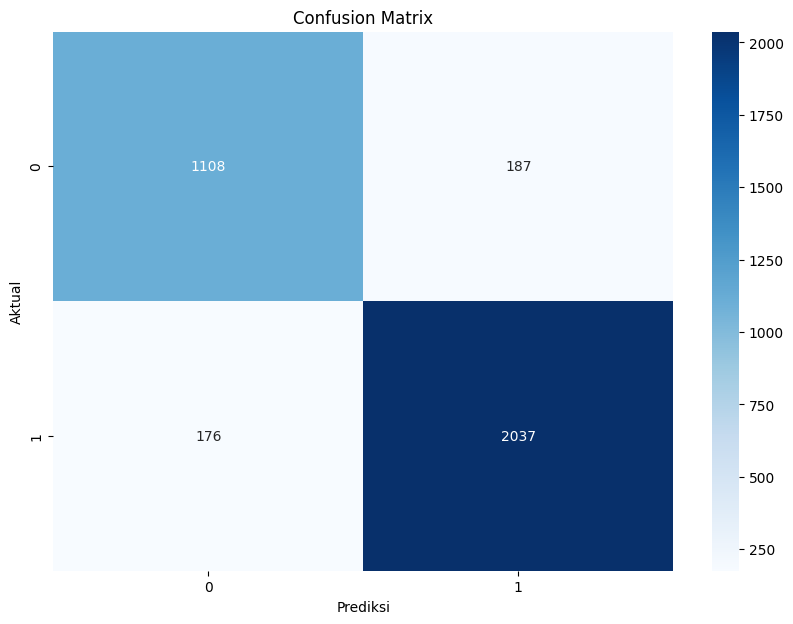

In [51]:
# Visualisasi Confussion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [52]:
# Menyimpan model ke dalam file menggunakan pickle
with open('./models/dataset_2/nb_model.pkl', 'wb') as file:
    pickle.dump(nb, file)

### 4. Neural Network

In [53]:
# Melakukan klasifikasi menggunakan Neural Network
nn = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)

# Melakukan evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")
print(classification_report(y_test, y_pred))

# Menyimpan hasil classification report ke dalam file CSV
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv('./data/classification_report_NN.csv')

Akurasi: 0.9834663625997719
                precision    recall  f1-score   support

Phishing Email       0.98      0.97      0.98      1295
    Safe Email       0.98      0.99      0.99      2213

      accuracy                           0.98      3508
     macro avg       0.98      0.98      0.98      3508
  weighted avg       0.98      0.98      0.98      3508



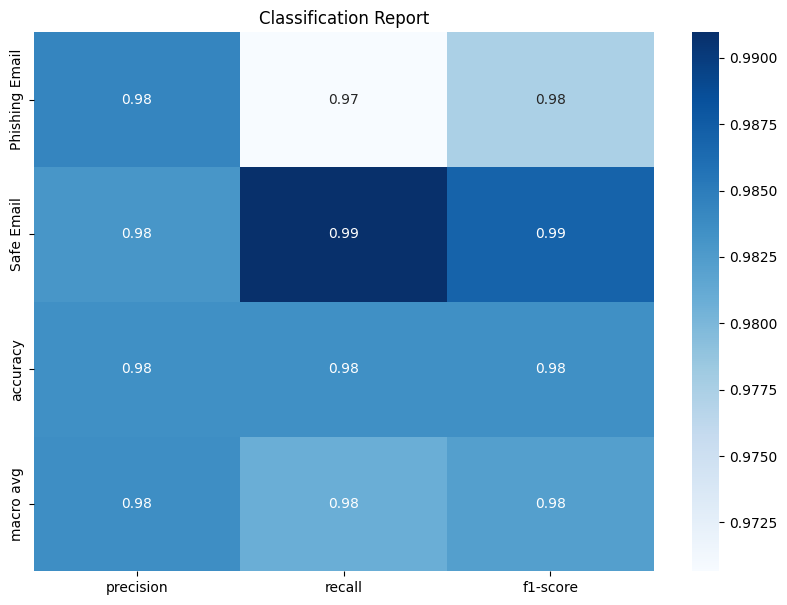

In [54]:
# Visualisasi hasil classification report
plt.figure(figsize=(10, 7))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

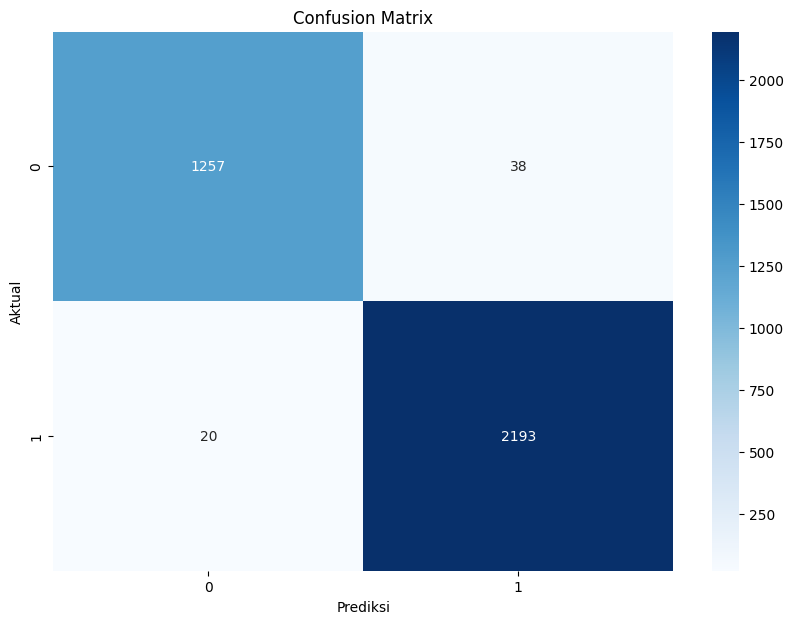

In [55]:
# Visualisasi Confussion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [56]:
# Menyimpan model ke dalam file menggunakan pickle
with open('./models/dataset_2/nn_model.pkl', 'wb') as file:
    pickle.dump(nn, file)

### 5. Komparasi Antar Model

#### Komparasi Confussion Matrix dari Setiap Model

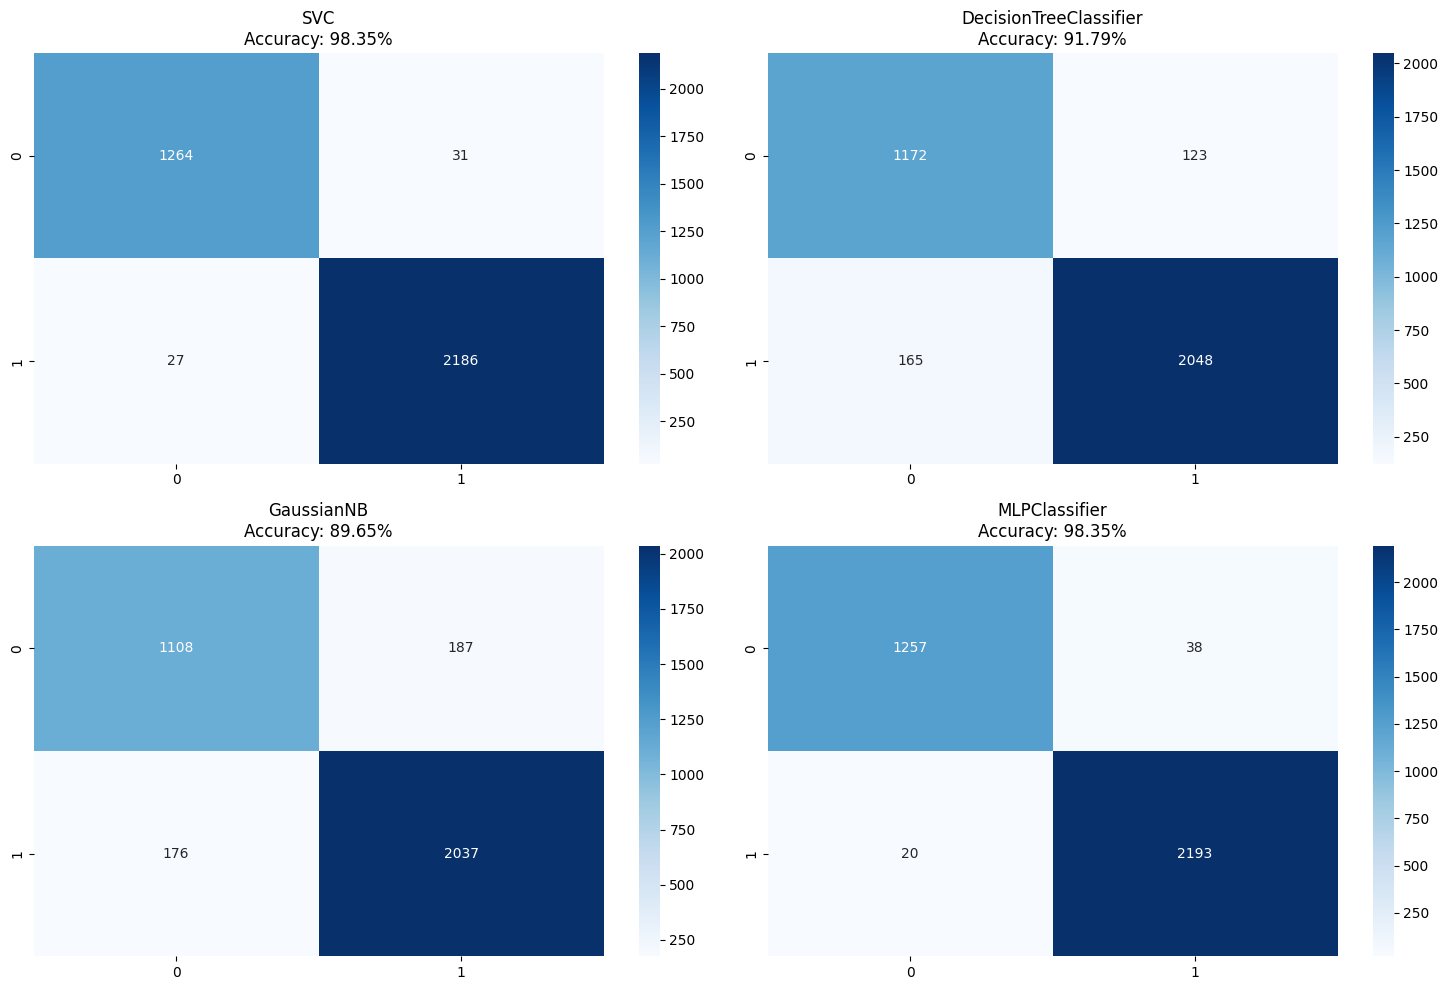

In [70]:
# Visualisasi confusion matrix untuk model SVM, DT, NB, dan NN untuk Perbandingan
def plot_confusion_matrix(models, X_test, y_test):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    for i, model in enumerate(models):
        y_pred = model.predict(X_test.toarray())
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        accuracy = accuracy_score(y_test, y_pred)
        axes[i].set_title(f'{model.__class__.__name__}\nAccuracy: {accuracy * 100:.2f}%')
    plt.tight_layout()
    plt.show()

models = [svm, dt, nb, nn]
plot_confusion_matrix(models, X_test, y_test)

#### Komparasi Akurasi dari Setiap Model

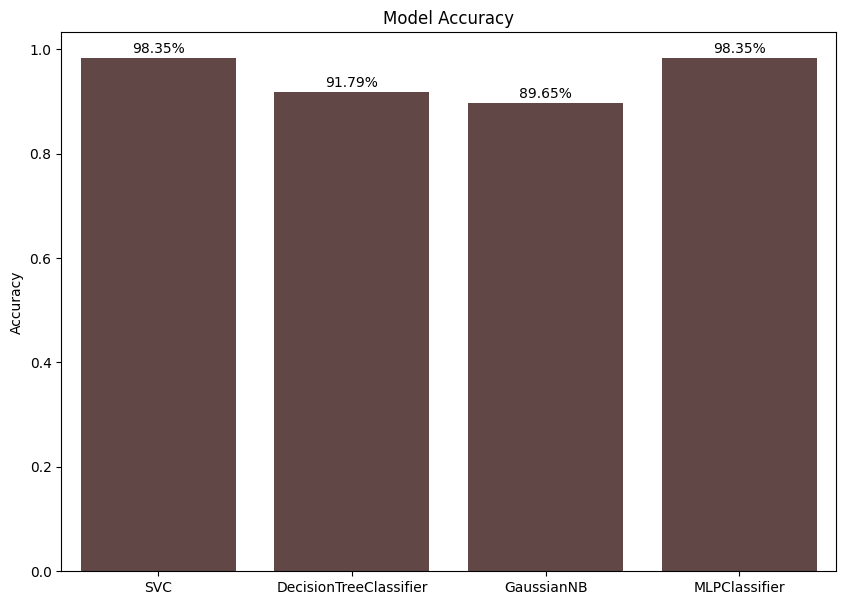

In [78]:
# Visualisasi Akurasi Model SVM, DT, NB, dan NN
def plot_accuracy(models, X_test, y_test):
    accuracy_scores = []
    for model in models:
        y_pred = model.predict(X_test.toarray())
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
    plt.figure(figsize=(10, 7))
    sns.barplot(x=[model.__class__.__name__ for model in models], y=accuracy_scores, color='#664343')
    for i, accuracy in enumerate(accuracy_scores):
        plt.text(i, accuracy + 0.01, f'{accuracy * 100:.2f}%', ha='center')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.show()

plot_accuracy(models, X_test, y_test)

## Prediksi Menggunakan Model

In [93]:
# Membuat Prediksi Menggunakan masing-masing Model
def predict_email(email_text, model):
    email_text = preprocess_text(email_text)
    email_text = tfidf.transform([email_text])
    if isinstance(model, GaussianNB):
        email_text = email_text.toarray()
    prediction = model.predict(email_text)
    return prediction[0]

email_text = """
Dear customer, your account has been flagged for suspicious activity. Please verify your credentials immediately. Thank you.

"""
svm_prediction = predict_email(email_text, svm)
dt_prediction = predict_email(email_text, dt)
nb_prediction = predict_email(email_text, nb)
nn_prediction = predict_email(email_text, nn)

print(f"Email Text: {email_text}")
print(f"SVM Prediction: {svm_prediction}")
print(f"Decision Tree Prediction: {dt_prediction}")
print(f"Naive Bayes Prediction: {nb_prediction}")
print(f"Neural Network Prediction: {nn_prediction}")

Email Text: 
Dear customer, your account has been flagged for suspicious activity. Please verify your credentials immediately. Thank you.


SVM Prediction: Phishing Email
Decision Tree Prediction: Phishing Email
Naive Bayes Prediction: Phishing Email
Neural Network Prediction: Phishing Email
